In [1]:
import pandas as pd
import numpy as np
from utils import *
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ivanserranozapata/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ivanserranozapata/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ivanserranozapata/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Ejemplo de como usar las funciones de pre procesamiento de texto

In [2]:
text = """
    This is an example text! It contains <html> tags, URLs like https://example.com, 
    numbers such as 12345, and special characters & symbols. Let's clean it up!
"""

In [3]:
# Normalizar el texto
normalized_text = normalize_text(text)
print("Texto normalizado:")
print(normalized_text)


Texto normalizado:
this is an example text it contains tags urls like numbers such as and special characters symbols let s clean it up


In [4]:
tokens = nltk.word_tokenize(normalized_text)
print("Tokens generados:")
print(tokens)


Tokens generados:
['this', 'is', 'an', 'example', 'text', 'it', 'contains', 'tags', 'urls', 'like', 'numbers', 'such', 'as', 'and', 'special', 'characters', 'symbols', 'let', 's', 'clean', 'it', 'up']


In [5]:
# Eliminar stopwords
tokens_no_stopwords = remove_stopwords(tokens)
print("Tokens sin stopwords:")
print(tokens_no_stopwords)


Tokens sin stopwords:
['example', 'text', 'contains', 'tags', 'urls', 'like', 'numbers', 'special', 'characters', 'symbols', 'let', 'clean']


In [6]:
# Bag of Words
train_corpus = ["This is an example text.", "Another text with different content."]
test_corpus = ["Example content is here."]

vectorizer, train_features, test_features = create_bow_features(train_corpus, test_corpus)

print("Características BOW del conjunto de entrenamiento:")
print(train_features.toarray())
print("Características BOW del conjunto de prueba:")
print(test_features.toarray())
print("Nombres de las características:")
print(vectorizer.get_feature_names_out())


Características BOW del conjunto de entrenamiento:
[[1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1]]
Características BOW del conjunto de prueba:
[[0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]]
Nombres de las características:
['an' 'an example' 'an example text' 'another' 'another text'
 'another text with' 'content' 'different' 'different content' 'example'
 'example text' 'is' 'is an' 'is an example' 'text' 'text with'
 'text with different' 'this' 'this is' 'this is an' 'with'
 'with different' 'with different content']


### Ejemplo modelo de regresión logística usando BoW

In [16]:
from sklearn.linear_model import LogisticRegression
from utils_test import *

In [9]:
df_train = pd.read_parquet('data/data_train.parquet')
df_test = pd.read_parquet('data/data_test.parquet')
df_train

,polarity,title,text
0,2,"Finally a Decent Metallica, Welcome Back Guys!!","Being a metal head from the early early 80's, ..."
1,2,There's so much Van it's easy to get lost,To anybody not familiar with Van's non-radio r...
2,1,Does not teach the TM Technique!!!,For the past few months i have been doing medi...
3,1,Horrible,This is a truly terrible book. Even though it ...
4,2,Best pregnancy purchase yet!,I love this pillow and can't imagine pregnancy...
...,...,...,...
299995,1,"OKAY, The Joke Is Over!",WOW! This collection sure SUCKS!As Simon Cowel...
299996,2,A rip-roaring adventure,I knew this was a good book before I read it. ...
299997,2,Romantic Melodies,I love all aspects of the beauty of the instru...
299998,1,Very Disappointed,I was very disappointed by these headphones. T...


In [10]:
## cambiamos la etiqueta a binario, 1 == positivo, 0== negativo 
##polarity - 1 for negative and 2 for positive
df_train['target'] = np.where(df_train['polarity']==2,1,0)
df_test['target'] = np.where(df_test['polarity']==2,1,0)

In [11]:
#1 preprocesamos el text
df_train['normalized_text'] = df_train['text'].apply(normalize_text)
df_train['tokens'] = df_train['normalized_text'].apply(nltk.word_tokenize)
df_train['tokens_no_stopwords'] = df_train['tokens'].apply(remove_stopwords)

df_test['normalized_text'] = df_test['text'].apply(normalize_text)
df_test['tokens'] = df_test['normalized_text'].apply(nltk.word_tokenize)
df_test['tokens_no_stopwords'] = df_test['tokens'].apply(remove_stopwords)

df_train


,polarity,title,text,target,normalized_text,tokens,tokens_no_stopwords
0,2,"Finally a Decent Metallica, Welcome Back Guys!!","Being a metal head from the early early 80's, ...",1,being a metal head from the early early s i ha...,"[being, a, metal, head, from, the, early, earl...","[metal, head, early, early, enjoyed, metal, co..."
1,2,There's so much Van it's easy to get lost,To anybody not familiar with Van's non-radio r...,1,to anybody not familiar with van s non radio r...,"[to, anybody, not, familiar, with, van, s, non...","[anybody, familiar, van, non, radio, repertoir..."
2,1,Does not teach the TM Technique!!!,For the past few months i have been doing medi...,0,for the past few months i have been doing medi...,"[for, the, past, few, months, i, have, been, d...","[past, months, meditation, daily, since, readi..."
3,1,Horrible,This is a truly terrible book. Even though it ...,0,this is a truly terrible book even though it i...,"[this, is, a, truly, terrible, book, even, tho...","[truly, terrible, book, even, though, extremem..."
4,2,Best pregnancy purchase yet!,I love this pillow and can't imagine pregnancy...,1,i love this pillow and can t imagine pregnancy...,"[i, love, this, pillow, and, can, t, imagine, ...","[love, pillow, imagine, pregnancy, without, go..."
...,...,...,...,...,...,...,...
299995,1,"OKAY, The Joke Is Over!",WOW! This collection sure SUCKS!As Simon Cowel...,0,wow this collection sure sucks as simon cowell...,"[wow, this, collection, sure, sucks, as, simon...","[wow, collection, sure, sucks, simon, cowell, ..."
299996,2,A rip-roaring adventure,I knew this was a good book before I read it. ...,1,i knew this was a good book before i read it h...,"[i, knew, this, was, a, good, book, before, i,...","[knew, good, book, read, husband, made, read, ..."
299997,2,Romantic Melodies,I love all aspects of the beauty of the instru...,1,i love all aspects of the beauty of the instru...,"[i, love, all, aspects, of, the, beauty, of, t...","[love, aspects, beauty, instrumentals, mannhei..."
299998,1,Very Disappointed,I was very disappointed by these headphones. T...,0,i was very disappointed by these headphones th...,"[i, was, very, disappointed, by, these, headph...","[disappointed, headphones, srs, mode, distorte..."


In [12]:
#2 crear BoW
train_corpus = df_train['tokens_no_stopwords'].apply(lambda x: ' '.join(x)).tolist()
test_corpus = df_test['tokens_no_stopwords'].apply(lambda x: ' '.join(x)).tolist()

vectorizer, train_features, test_features = create_bow_features(train_corpus, test_corpus)

In [13]:
#3 variables
X_train = train_features
X_test = test_features
y_train = df_train['target']
y_test = df_test['target']

In [17]:
#4 modelo
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
# evaluar modelo
y_pred_proba = model.predict_proba(X_test)[:,1]

In [19]:
y_test.value_counts()

target
1    40000
0    40000
Name: count, dtype: int64

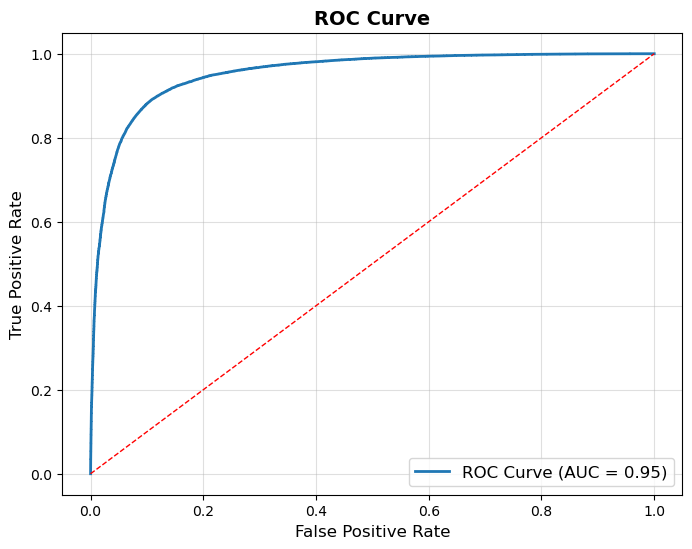

In [20]:
# ROC-AUC
plot_roc_auc(y_pred_proba, y_test)

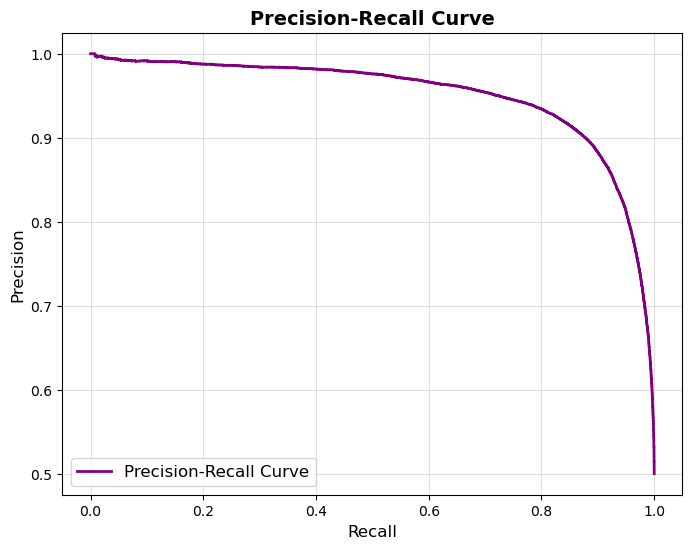

In [21]:
# PR curve
plot_precision_recall_curve(y_pred_proba, y_test)

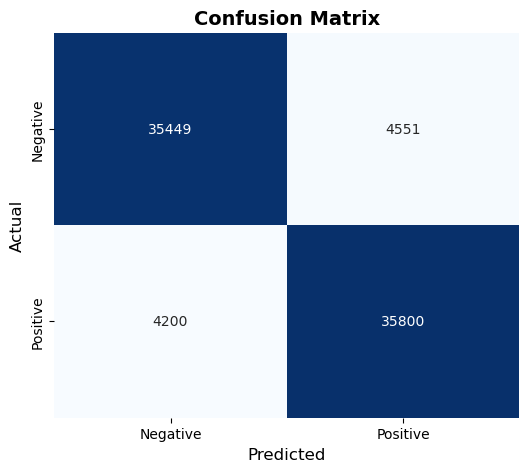

Classification Metrics:

              precision    recall  f1-score   support

    Negative       0.89      0.89      0.89     40000
    Positive       0.89      0.90      0.89     40000

    accuracy                           0.89     80000
   macro avg       0.89      0.89      0.89     80000
weighted avg       0.89      0.89      0.89     80000

Accuracy: 0.89


In [22]:
# conf matriz
plot_confusion_matrix_and_metrics(y_pred_proba, y_test, threshold=0.5)

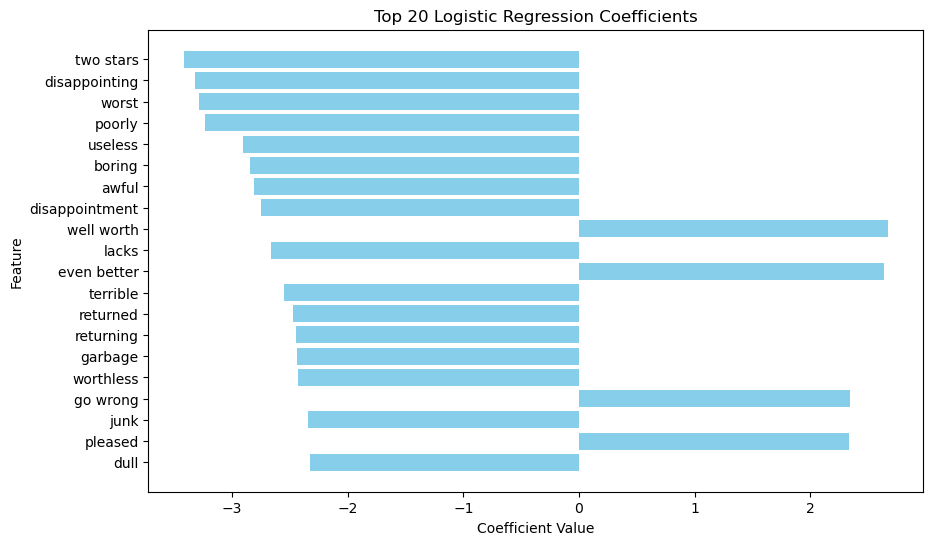

In [23]:
import matplotlib.pyplot as plt

feature_names = vectorizer.get_feature_names_out()

coefficients = model.coef_.flatten()

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

top_n = 20  
coef_df["Abs_Coefficient"] = np.abs(coef_df["Coefficient"])
top_features = coef_df.nlargest(top_n, "Abs_Coefficient")

plt.figure(figsize=(10, 6))
plt.barh(top_features["Feature"], top_features["Coefficient"], color="skyblue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title(f"Top {top_n} Logistic Regression Coefficients")
plt.gca().invert_yaxis() 
plt.show()